In [72]:
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit import QuantumCircuit
from qiskit import Aer
from qiskit import execute
from numpy import pi

In [88]:
# initialize
qreg = QuantumRegister(8, name='q')
creg = ClassicalRegister(8)
init = QuantumCircuit(qreg, creg)
# create equal superposition
init.h(0)
init.h(1)
init.h(2)

# setup the oracle qubit in |->=(|0>-|1>)/sqrt(2) state
init.x(3)
init.h(3)
#qc.draw(output='mpl')

In [89]:
# oracle1
oracle1 = QuantumCircuit(qreg, creg)
    
oracle1.x(2)
oracle1.cx(0,4)
oracle1.cx(1,4)
oracle1.cx(2,4)

# logical AND1
oracle1.ccx(0,1,7)
oracle1.ccx(2,7,4)
oracle1.ccx(0,1,7)
oracle1.x(2)

In [90]:
# oracle2
oracle2 = QuantumCircuit(qreg, creg)
oracle2.x(0)
oracle2.x(1)
oracle2.x(2)
oracle2.cx(0,5)
oracle2.cx(1,5)
oracle2.cx(2,5)

# logical AND2
oracle2.ccx(0,1,7)
oracle2.ccx(2,7,5)
oracle2.ccx(0,1,7)

oracle2.x(0)
oracle2.x(1)
oracle2.x(2)

In [91]:
# oracle3
oracle3 = QuantumCircuit(qreg, creg)
oracle3.x(0)
oracle3.cx(0,6)
oracle3.cx(1,6)
oracle3.cx(2,6)

# logical AND3
oracle3.ccx(0,1,7)
oracle3.ccx(2,7,6)
oracle3.ccx(0,1,7)
oracle3.x(0)

In [92]:
forward_oracle = oracle1 + oracle2 + oracle3

In [93]:
# readout oracle
ro_oracle = QuantumCircuit(qreg, creg)
ro_oracle.ccx(4,5,7)
ro_oracle.ccx(7,6,3)
ro_oracle.ccx(4,5,7)

In [94]:
oracle = forward_oracle + ro_oracle + forward_oracle.inverse()

In [95]:
# inversion
inversion = QuantumCircuit(qreg, creg)
inversion.x(0)
inversion.h(1)
inversion.h(2)
inversion.x(0)
inversion.x(1)
inversion.x(2)

# the equivaltent of controlled-controlled-Z
inversion.h(2)
inversion.ccx(0,1,2)
inversion.h(2)

inversion.x(0)
inversion.x(1)
inversion.x(2)
inversion.h(0)
inversion.h(1)
inversion.h(2)

In [96]:
grover_iters = 1
grover_iter =  oracle + inversion

grover = QuantumCircuit(qreg, creg)

# the final Grover algorithm
for _ in range(grover_iters):
    grover += grover_iter 
    
grover = init + grover
grover.measure(qreg[0:3], creg[0:3])

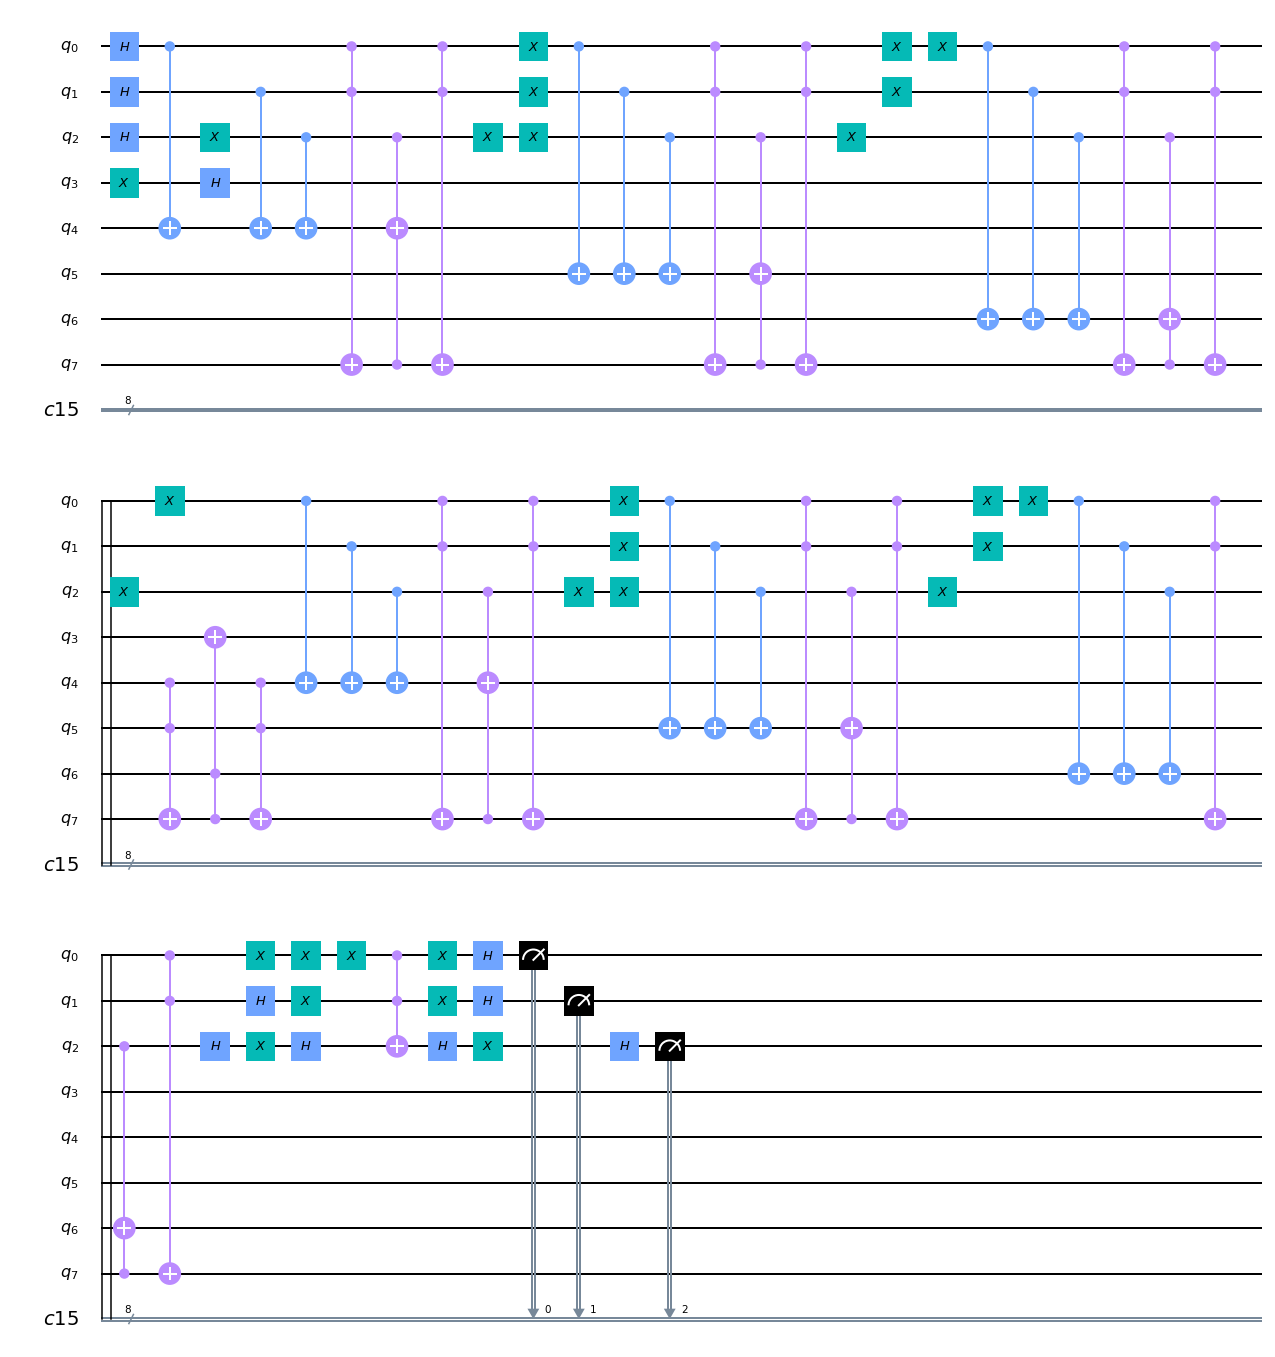

In [86]:
grover.draw(output='mpl')

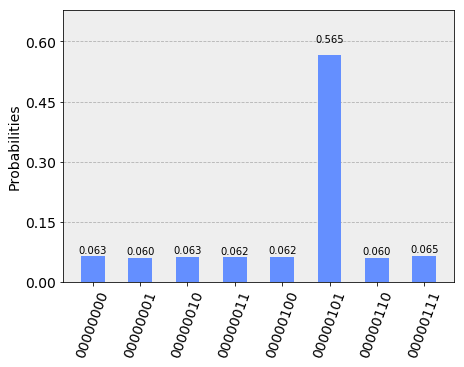

In [98]:
simulator = Aer.get_backend('qasm_simulator')
results = execute(grover, simulator, shots=10000).result()
from qiskit.tools.visualization import plot_histogram


plot_histogram(results.get_counts())